In [106]:
import pandas as pd
import numpy as np
import shapely
import matplotlib.pylab as plt
import geopandas
import fiona
import rtree

from geopandas import GeoDataFrame
from fiona.crs import from_epsg
from shapely.geometry import Point

%matplotlib inline

In [86]:
path = "/Users/achillessaxby/gittest_achilles/Safety_Score-Pluto_Cleaning/Data/Cleaned_DataSets/"
q_score = pd.read_csv(path + "streetscore_newyorkcity.csv")
q_score.head()

,latitude,longitude,q-score
0,40.700909,-74.013504,11.062166
1,40.701000,-74.013878,10.818611
2,40.701080,-74.012878,12.677955
3,40.701187,-74.013268,11.417325
4,40.701244,-74.012115,25.199091


In [87]:
crs = None
geometry = [Point(xy) for xy in zip(q_score.longitude, q_score.latitude)]
qscore_geo = GeoDataFrame(q_score, crs=crs, geometry=geometry)
qscore_geo.crs = fiona.crs.from_epsg(4326)

In [88]:
qscore_geo.head()

,latitude,longitude,q-score,geometry
0,40.700909,-74.013504,11.062166,POINT (-74.013504 40.700909)
1,40.701000,-74.013878,10.818611,POINT (-74.01387800000001 40.701)
2,40.701080,-74.012878,12.677955,POINT (-74.012878 40.70108)
3,40.701187,-74.013268,11.417325,POINT (-74.01326800000001 40.701187)
4,40.701244,-74.012115,25.199091,POINT (-74.01211500000001 40.701244)


In [89]:
shape_path = "/Users/achillessaxby/gittest_achilles/Safety_Score-Pluto_Cleaning/Data/mn_mappluto_16v2/MNMapPLUTO.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.to_crs(epsg=4326, inplace=True)

In [90]:
ct_shape.head()

,APPBBL,APPDate,Address,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1 ELLIS ISLAND,2,14972400.0,108450450.0,1.000010e+09,603130,Z9,0.0,...,0,1900,None,10004,R3-2,None,None,None,12b,POLYGON ((-74.04001513073896 40.70084115682083...
1,1.000090e+09,12/26/1985,17 STATE STREET,2,14670000.0,59250600.0,1.000090e+09,544015,O4,118.0,...,0,1987,None,10004,C5-5,None,None,None,12b,POLYGON ((-74.01355236444213 40.70306951438091...
2,1.000150e+09,12/29/1998,17 BATTERY PLACE,2,15867000.0,103923450.0,1.000158e+09,1202417,RM,0.0,...,0,1902,None,10004,C5-5,None,None,None,12b,"POLYGON ((-74.0153321127314 40.7060043635493, ..."
3,0.000000e+00,None,11 BROADWAY,2,5625000.0,29257650.0,1.000130e+09,434220,O4,200.0,...,0,1900,None,10004,C5-5,None,None,None,12b,POLYGON ((-74.01379795980122 40.70540360469463...
4,0.000000e+00,None,1 GOVERNORS ISLAND,2,104445450.0,156510900.0,1.000010e+09,2725731,Y4,0.0,...,0,1900,Y,10004,R3-2,None,None,None,16a,"POLYGON ((-74.0169058261969 40.69335343100449,..."


In [91]:
ct_shape.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AreaSource',
       u'AssessLand',  u'AssessTot',        u'BBL',   u'BldgArea',
        u'BldgClass',  u'BldgDepth',  u'BldgFront',      u'Block',
         u'BoroCode',    u'Borough',   u'BsmtCode',   u'BuiltFAR',
           u'CB2010',         u'CD',     u'CT2010',    u'ComArea',
          u'CommFAR',    u'CondoNo',    u'Council',  u'EDesigNum',
        u'Easements', u'ExemptLand',  u'ExemptTot',        u'Ext',
         u'FacilFAR', u'FactryArea',   u'FireComp', u'GarageArea',
       u'HealthArea',   u'HistDist', u'IrrLotCode',    u'LandUse',
         u'Landmark',        u'Lot',    u'LotArea',   u'LotDepth',
         u'LotFront',    u'LotType',  u'LtdHeight', u'MAPPLUTO_F',
         u'NumBldgs',  u'NumFloors', u'OfficeArea',  u'OtherArea',
         u'Overlay1',   u'Overlay2',  u'OwnerName',  u'OwnerType',
       u'PLUTOMapID', u'PolicePrct',   u'ProxCode',    u'ResArea',
         u'ResidFAR', u'RetailArea', u'SHAPE_Area', u'SHAPE_Le

In [92]:
MN_Shape = ct_shape.drop([u'Borough', u'CD', u'CB2010', u'Council', u'SanitBoro', u'SanitDistr', u'SanitSub', 
                          u'Overlay1',u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight', u'SplitZone', 
                          u'Easements', u'OwnerName', u'AreaSource', u'IrrLotCode', u'BsmtCode', u'AssessLand', 
                          u'AssessTot', u'ExemptLand', u'ExemptTot', u'YearAlter1', u'YearAlter2',u'BuiltFAR', 
                          u'ResidFAR', u'CommFAR', u'FacilFAR', u'BoroCode', u'BBL', u'CondoNo', u'Tract2010', 
                          u'ZoneMap', u'ZMCode', u'Sanborn', u'TaxMap', u'EDesigNum', u'APPBBL', u'APPDate', 
                          u'PLUTOMapID', u'Version', u'Ext', u'HistDist', u'Landmark', u'ZoneDist2', u'ZoneDist3', 
                          u'ZoneDist4'], axis = 1)

In [93]:
MN_Shape.columns

Index([   u'Address',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',     u'CT2010',    u'ComArea',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
          u'LandUse',        u'Lot',    u'LotArea',   u'LotDepth',
         u'LotFront',    u'LotType', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',  u'OwnerType',
       u'PolicePrct',   u'ProxCode',    u'ResArea', u'RetailArea',
       u'SHAPE_Area', u'SHAPE_Leng', u'SchoolDist',  u'StrgeArea',
         u'UnitsRes', u'UnitsTotal',     u'XCoord',     u'YCoord',
        u'YearBuilt',    u'ZipCode',  u'ZoneDist1',   u'geometry'],
      dtype='object')

In [94]:
MN_Shape_2 = MN_Shape.drop([u'Address', u'BldgClass', u'BldgDepth', u'ComArea', u'FactryArea',
              u'FireComp', u'GarageArea', u'HealthArea', u'Lot',u'LotDepth',u'LotFront',
              u'LotType',u'OfficeArea',  u'OtherArea',  u'OwnerType',u'PolicePrct',   
              u'ProxCode',    u'ResArea', u'RetailArea',u'SHAPE_Leng', u'SchoolDist',  
              u'StrgeArea', u'UnitsRes',u'ZoneDist1'],axis = 1)
MN_Shape_2.columns

Index([  u'BldgArea',  u'BldgFront',      u'Block',     u'CT2010',
          u'LandUse',    u'LotArea', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'SHAPE_Area', u'UnitsTotal',     u'XCoord',
           u'YCoord',  u'YearBuilt',    u'ZipCode',   u'geometry'],
      dtype='object')

In [95]:
MN_Shape_2.head()

,BldgArea,BldgFront,Block,CT2010,LandUse,LotArea,MAPPLUTO_F,NumBldgs,NumFloors,SHAPE_Area,UnitsTotal,XCoord,YCoord,YearBuilt,ZipCode,geometry
0,603130,0.0,1,1,None,2764190,0,7,0.0,1.148541e+06,0,972790,193648,1900,10004,POLYGON ((-74.04001513073896 40.70084115682083...
1,544015,176.0,9,9,05,23080,0,1,42.0,2.373306e+04,0,980402,195359,1987,10004,POLYGON ((-74.01355236444213 40.70306951438091...
2,1202417,0.0,15,13,04,64633,7,2,31.0,6.753824e+04,602,979859,196346,1902,10004,"POLYGON ((-74.0153321127314 40.7060043635493, ..."
3,434220,152.0,13,13,05,28814,0,1,22.0,3.068607e+04,50,980293,196230,1900,10004,POLYGON ((-74.01379795980122 40.70540360469463...
4,2725731,0.0,1,5,08,7736692,0,158,0.0,7.550344e+06,0,979071,190225,1900,10004,"POLYGON ((-74.0169058261969 40.69335343100449,..."


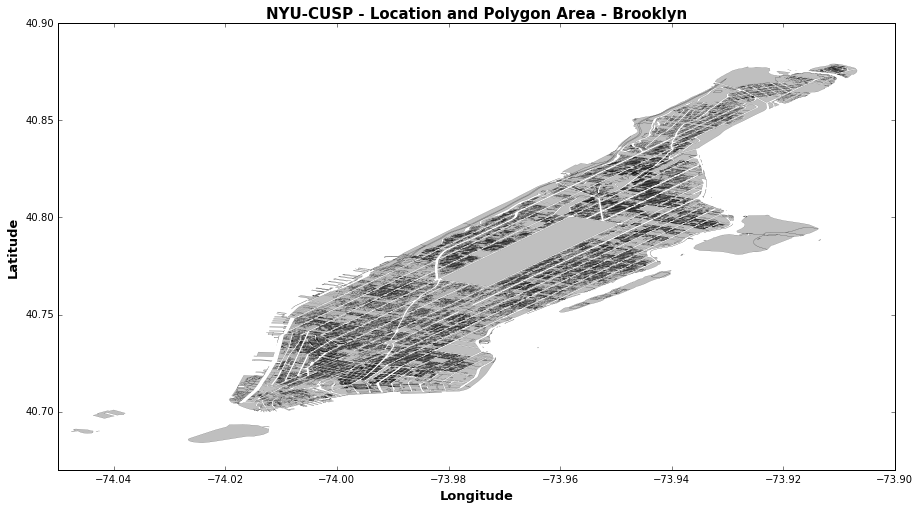

In [96]:
fig, ax = plt.subplots(1, figsize = (15,8))
MN_Shape_2.plot(ax=ax, color = 'grey', linewidth=0.1)

plt.xlim(-74.05, -73.9)
plt.ylim(40.67, 40.9)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title('NYU-CUSP - Location and Polygon Area - Brooklyn'
          , fontsize = 15, fontweight = 'bold')
plt.show()

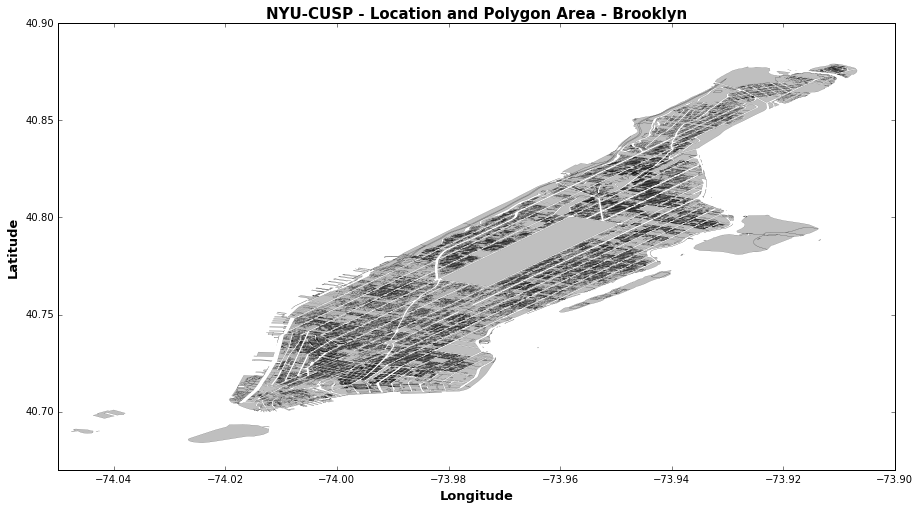

In [97]:
fig, ax = plt.subplots(1, figsize = (15,8))
ct_shape.plot(ax=ax, color = 'grey', linewidth=0.1)

plt.xlim(-74.05, -73.9)
plt.ylim(40.67, 40.9)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title('NYU-CUSP - Location and Polygon Area - Brooklyn'
          , fontsize = 15, fontweight = 'bold')
plt.show()

In [98]:
MN_Shape_joined = gpd.sjoin(MN_Shape_2, qscore_geo, how="inner", op='intersects')
MN_Shape_joined.head()

,BldgArea,BldgFront,Block,CT2010,LandUse,LotArea,MAPPLUTO_F,NumBldgs,NumFloors,SHAPE_Area,UnitsTotal,XCoord,YCoord,YearBuilt,ZipCode,geometry,index_right,latitude,longitude,q-score
1,544015,176.0,9,9,05,23080,0,1,42.0,23733.055673,0,980402,195359,1987,10004,POLYGON ((-74.01355236444213 40.70306951438091...,56,40.702885,-74.013702,27.254408
1,544015,176.0,9,9,05,23080,0,1,42.0,23733.055673,0,980402,195359,1987,10004,POLYGON ((-74.01355236444213 40.70306951438091...,57,40.702888,-74.014076,31.587860
2,1202417,0.0,15,13,04,64633,7,2,31.0,67538.239876,602,979859,196346,1902,10004,"POLYGON ((-74.0153321127314 40.7060043635493, ...",197,40.705231,-74.015816,24.271835
2,1202417,0.0,15,13,04,64633,7,2,31.0,67538.239876,602,979859,196346,1902,10004,"POLYGON ((-74.0153321127314 40.7060043635493, ...",224,40.705566,-74.016006,31.223354
2,1202417,0.0,15,13,04,64633,7,2,31.0,67538.239876,602,979859,196346,1902,10004,"POLYGON ((-74.0153321127314 40.7060043635493, ...",252,40.705906,-74.015419,21.962553


In [101]:
MN_Shape_joined_2 = gpd.sjoin(qscore_geo, MN_Shape_2, how="inner", op='intersects')
MN_Shape_joined_2.head()

,latitude,longitude,q-score,geometry,index_right,BldgArea,BldgFront,Block,CT2010,LandUse,LotArea,MAPPLUTO_F,NumBldgs,NumFloors,SHAPE_Area,UnitsTotal,XCoord,YCoord,YearBuilt,ZipCode
0,40.700909,-74.013504,11.062166,POINT (-74.013504 40.700909),27,280000,268.0,2,9,07,209215,0,2,5.0,100825.002813,0,980670,194440,1900,10004
2,40.701080,-74.012878,12.677955,POINT (-74.012878 40.70108),27,280000,268.0,2,9,07,209215,0,2,5.0,100825.002813,0,980670,194440,1900,10004
1,40.701000,-74.013878,10.818611,POINT (-74.01387800000001 40.701),16,123800,37.0,3,319,None,123800,0,2,3.0,42164.641441,1,980245,194640,1960,10004
4,40.701244,-74.012115,25.199091,POINT (-74.01211500000001 40.701244),49,158197,205.0,2,9,07,191502,0,1,5.0,87244.099282,0,981037,194506,1900,10004
7,40.701462,-74.014297,11.072771,POINT (-74.014297 40.701462),10,945425,89.0,3,319,09,945425,0,6,1.0,921410.127585,4,979916,195328,1951,10004


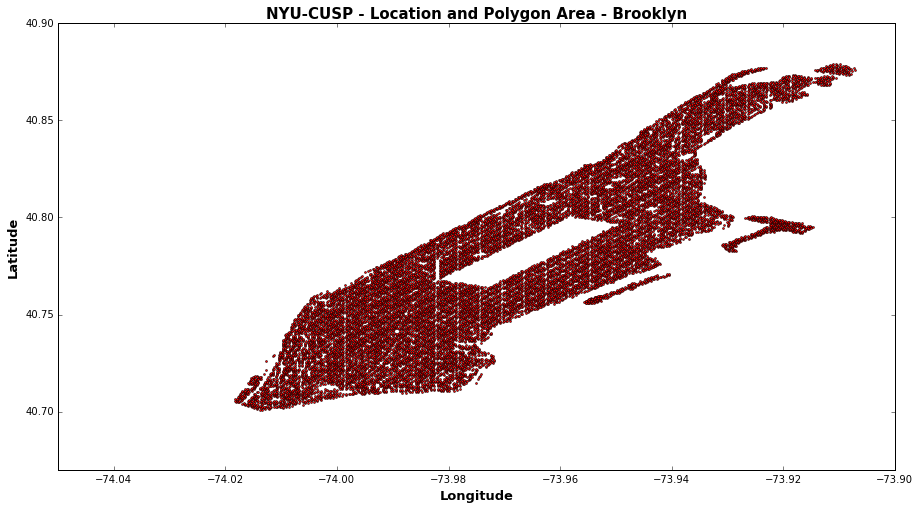

In [105]:
fig, ax = plt.subplots(1, figsize = (15,8))
MN_Shape_joined_2.plot(ax=ax, color = 'red', linewidth=0.1)

plt.xlim(-74.05, -73.9)
plt.ylim(40.67, 40.9)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title('NYU-CUSP - Location and Polygon Area - Brooklyn'
          , fontsize = 15, fontweight = 'bold')
plt.show()

In [107]:
MN_Shape_joined.to_csv('MN_Geometry_Joined.csv')

In [108]:
MN_Shape_joined_2.to_csv('MN_Point_Joined.csv')